# Car Prices

🎯 Main purpose is to prepare the dataset and to implement feature selection.

🚗 Working on a cars dataset. Try to decide on whether a car is expensive or cheap.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Checking whether a numerical characteristic follows a normal distribution
from statsmodels.graphics.gofplots import qqplot


In [2]:
url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Cars_dataset.csv"

In [3]:
df = pd.read_csv("ML_Cars_dataset.csv")
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ Dataset explanation is [here](https://drive.google.com/file/d/1ADSyjWfRGYqdXwCCN4PPC7PjQeMZ-ap-/view?usp=sharing ).

## (1) Duplicates

In [4]:
print(f"There are {df.duplicated().sum()} duplicate rows in the dataset.")

df = df.drop_duplicates().reset_index(drop=True)
print(f"After removing duplicates, the dataset has {df.duplicated().sum()} duplicated rows.")

There are 14 duplicate rows in the dataset.
After removing duplicates, the dataset has 0 duplicated rows.


## (2) Missing values

In [5]:
round(df.isnull().sum().sort_values(ascending=False)/len(df), 3) # NaN percentage of each column

enginelocation    0.052
carwidth          0.010
aspiration        0.000
curbweight        0.000
enginetype        0.000
cylindernumber    0.000
stroke            0.000
peakrpm           0.000
price             0.000
dtype: float64

### `carwidth`

In [6]:
df.carwidth.value_counts(dropna=False) # Check unique values in carwidth

carwidth
66.5    22
63.8    19
65.4    15
63.6     9
68.4     9
64       9
64.4     9
65.5     8
65.2     7
65.6     6
64.2     6
66.3     6
67.2     6
66.9     5
67.9     5
*        4
68.9     4
71.7     3
70.3     3
65.7     3
63.9     3
64.8     3
65       2
67.7     2
68.3     2
71.4     2
NaN      2
66.6     1
63.4     1
72.3     1
64.1     1
68       1
72       1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66       1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: count, dtype: int64

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer

df = df.replace("*", np.nan) # Replace occurrences of "*" with np.nan

carwidth_imputer = SimpleImputer(strategy="mean")
carwidth_imputer.fit(df[["carwidth"]])
df["carwidth"] = carwidth_imputer.transform(df[["carwidth"]])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.100000,2548,dohc,four,2.68,5000,expensive
1,std,front,65.500000,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.976216,2337,ohc,four,3.40,5500,expensive
3,std,front,66.400000,2824,ohc,five,3.40,5500,expensive
4,std,front,66.300000,2507,ohc,five,3.40,5500,expensive


### `enginelocation`

In [8]:
print(df.enginelocation.unique())

['front' nan 'rear']


In [9]:
print(df.enginelocation.value_counts(dropna=False)) # Count each value

enginelocation
front    179
NaN       10
rear       2
Name: count, dtype: int64


In [10]:

engine_imputer = SimpleImputer(strategy="most_frequent")

engine_imputer.fit(df[["enginelocation"]])

df[["enginelocation"]] = engine_imputer.transform(df[["enginelocation"]])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.100000,2548,dohc,four,2.68,5000,expensive
1,std,front,65.500000,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.976216,2337,ohc,four,3.40,5500,expensive
3,std,front,66.400000,2824,ohc,five,3.40,5500,expensive
4,std,front,66.300000,2507,ohc,five,3.40,5500,expensive


In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

## (3) Scaling the numerical features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 13.6+ KB


In [13]:
# numerical features of the dataset we need to scale
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

### `peakrpm` , `carwidth` , & `stroke`

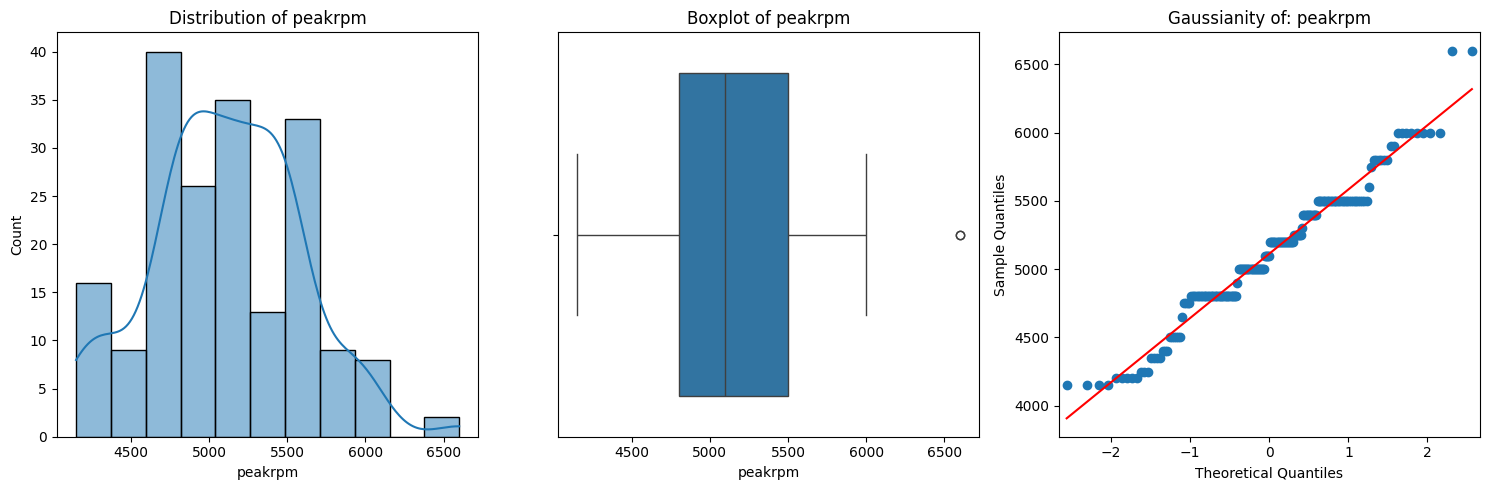

In [14]:
variable = "peakrpm"

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title(f"Distribution of {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot of {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of: {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

plt.tight_layout()

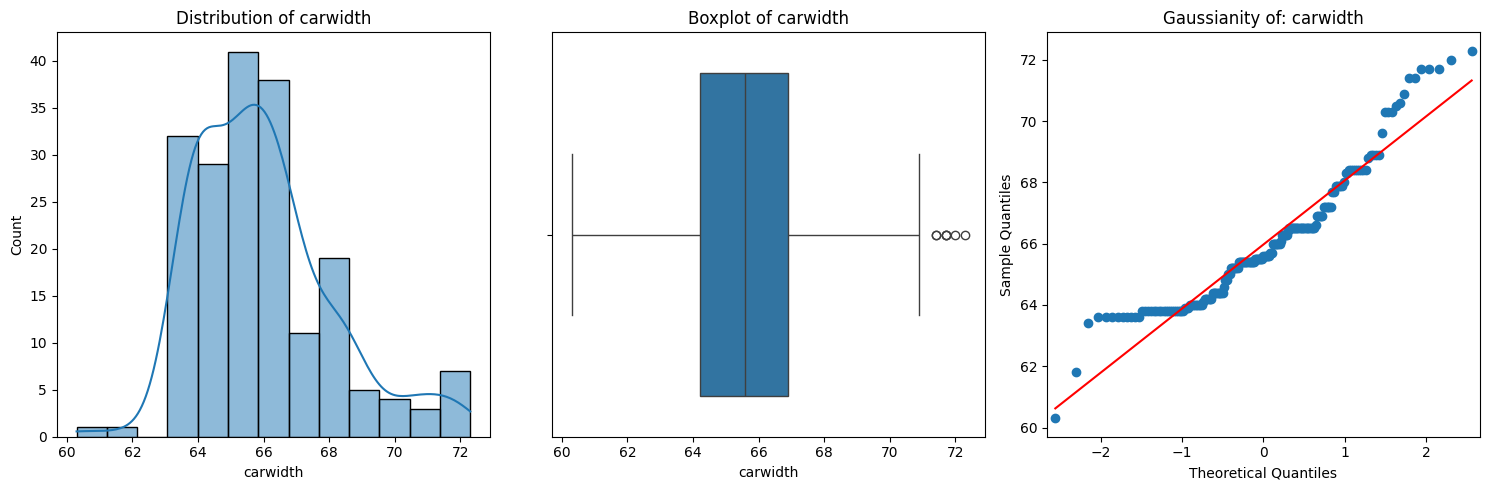

In [15]:
variable = "carwidth"

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title(f"Distribution of {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot of {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of: {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

plt.tight_layout()

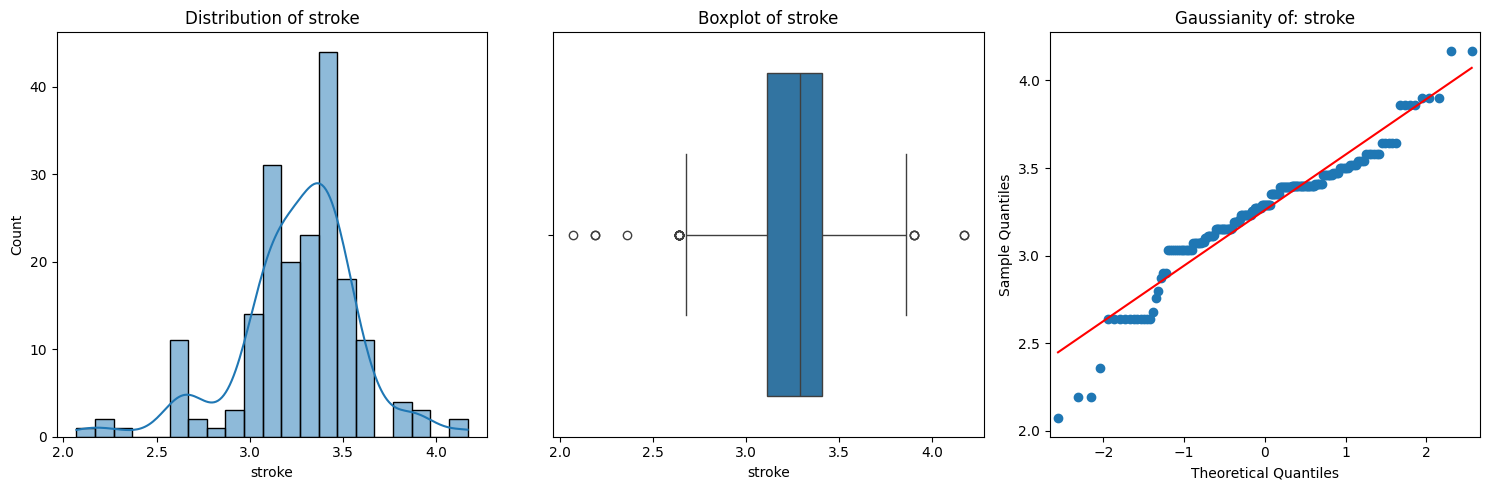

In [16]:
variable = "stroke"

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title(f"Distribution of {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot of {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of: {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

plt.tight_layout()

In [17]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df["peakrpm"], df["carwidth"], df["stroke"] = rb_scaler.fit_transform(df[["peakrpm", "carwidth", "stroke"]]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,2548,dohc,four,-2.033333,-0.142857,expensive
1,std,front,-0.037037,2823,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.139339,2337,ohc,four,0.366667,0.571429,expensive
3,std,front,0.296296,2824,ohc,five,0.366667,0.571429,expensive
4,std,front,0.259259,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

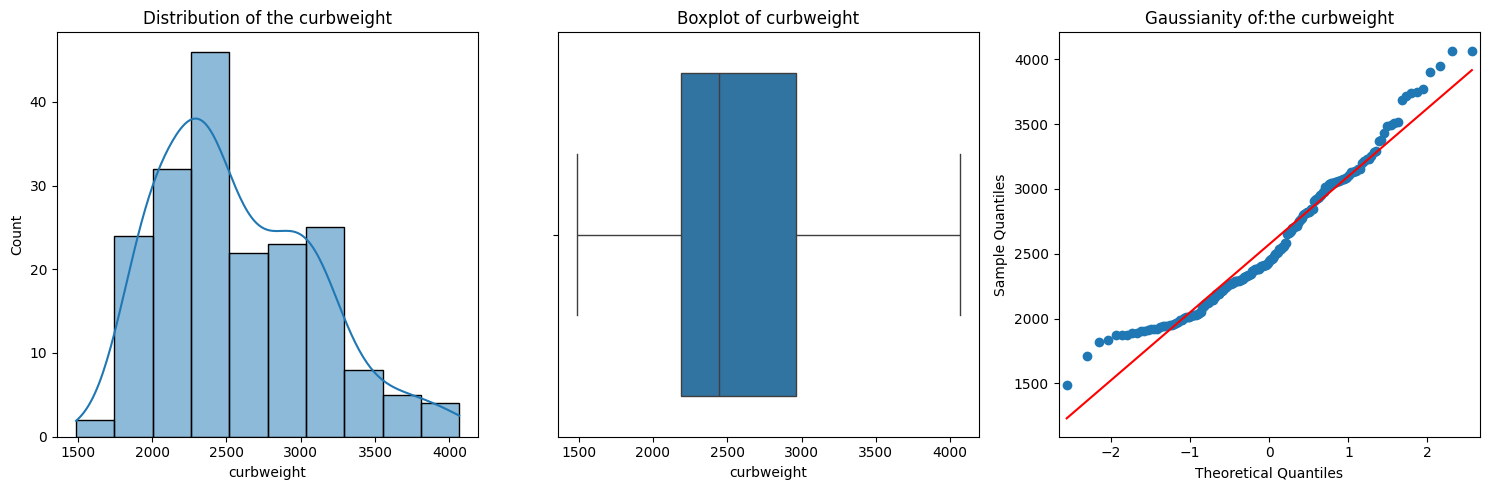

In [18]:
variable = "curbweight"

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax=ax[0])

ax[1].set_title(f"Boxplot of {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

plt.tight_layout()

In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,std,front,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
3,std,front,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
4,std,front,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

## (4) Encoding the categorical features

### `aspiration` & `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>


In [21]:
print(f"The unique values of `aspiration` are {df.aspiration.unique()}") # Check unique values of `aspiration`

print(f"The unique values of `enginelocation` are {df.enginelocation.unique()}") # Check unique values of `enginelocation`

The unique values of `aspiration` are ['std' 'turbo']
The unique values of `enginelocation` are ['front' 'rear']


In [22]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
df["aspiration"], df["enginelocation"] = binary_encoder.fit_transform(df[["aspiration", "enginelocation"]]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,0.0,0.0,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,0.0,0.0,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
3,0.0,0.0,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
4,0.0,0.0,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

In [23]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
df.shape

(191, 9)

In [25]:
ohe = OneHotEncoder(sparse_output=False)

# Fitting it
ohe.fit(df[["enginetype"]])

# Showing categories detected by the encoder
display(ohe.categories_)

display(ohe.get_feature_names_out())

enginetype_encoded = ohe.transform(df[["enginetype"]])

df[ohe.get_feature_names_out()] = enginetype_encoded

df.drop(columns=["enginetype"], inplace=True)

df

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

array(['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'], dtype=object)

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.555556,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.037037,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.139339,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.296296,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.259259,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,1.222222,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,1.185185,0.907408,four,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,1.222222,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,1.222222,1.227807,six,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

In [26]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [27]:
df["cylindernumber"] = df["cylindernumber"].map({"four": 4,
                                                 "six": 6,
                                                 "five": 5,
                                                 "three": 3,
                                                 "twelve": 12,
                                                 "two": 2,
                                                 "eight": 8})

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.555556,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.037037,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.139339,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.296296,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.259259,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
df["cylindernumber"].value_counts()

cylindernumber
4     147
6      23
5      11
8       5
2       3
3       1
12      1
Name: count, dtype: int64

(array([5., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  15.6,  30.2,  44.8,  59.4,  74. ,  88.6, 103.2, 117.8,
        132.4, 147. ]),
 <BarContainer object of 10 artists>)

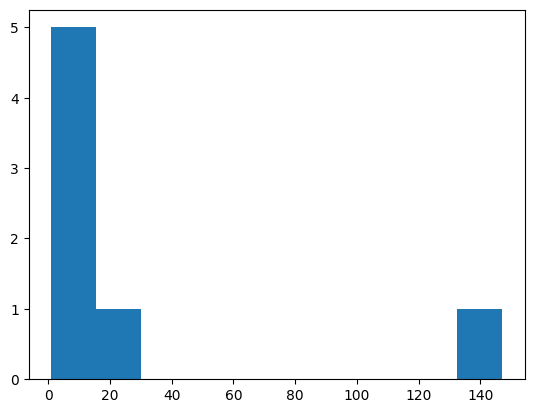

In [29]:
# Same but visualized through a histogram
import matplotlib.pyplot as plt
plt.hist(df["cylindernumber"].value_counts())

In [30]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

mm_scaler = MinMaxScaler()
mm = pd.DataFrame(mm_scaler.fit_transform(df[["cylindernumber"]]))

rb_scaler = RobustScaler()
rb = pd.DataFrame(rb_scaler.fit_transform(df[["cylindernumber"]]))

In [31]:
mm.value_counts()

0  
0.2    147
0.4     23
0.3     11
0.6      5
0.0      3
0.1      1
1.0      1
Name: count, dtype: int64

In [39]:
rb.value_counts()

0   
 0.0    147
 2.0     23
 1.0     11
 4.0      5
-2.0      3
-1.0      1
 8.0      1
Name: count, dtype: int64

In [32]:
df["cylindernumber"] = rb_scaler.fit_transform(df[["cylindernumber"]])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.555556,-0.048068,0.0,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.037037,0.476395,2.0,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.139339,-0.450474,0.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.296296,0.478302,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.259259,-0.126260,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `price`

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["price"] = label_encoder.fit_transform(df["price"])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.555556,-0.048068,0.0,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.037037,0.476395,2.0,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.139339,-0.450474,0.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.296296,0.478302,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.259259,-0.126260,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Testing the code**

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

## (5) Base Modelling

👏 Preprocessing is done and now data is ready for modeling.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=["price"])
y = df["price"]

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()
base_model_score


np.float64(0.8797368421052632)

🧪 **Testing the code**

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

## (6) Feature Selection (with _Permutation Importance_)

❓ **Questions** ❓

1. Apply feature permutation to identify the features that contribute the least information to the model.
2. Remove weak features from the dataset until you notice a clear drop in model performance.
3. Evaluate a new model with the resulting strong feature set using cross-validation and store the score in a variable called `strong_model_score`.


In [41]:
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Evaluating the model without permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv=5)
score = cv_results['test_score'].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

# Performing permutation importance
model.fit(X, y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T, # Unstack results
                            columns = ['feature','feature_importance'])
print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False) # Order by importance
importance_df

Before any feature permutation, the cross-validated accuracy is equal to 0.85
After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.282513
2,carwidth,0.11623
5,stroke,0.031937
11,enginetype_ohcf,0.019162
10,enginetype_ohc,0.014031
6,peakrpm,0.013927
13,enginetype_rotor,0.011099
0,aspiration,0.009791
4,cylindernumber,0.008429
7,enginetype_dohc,0.00534


In [ ]:
## Remove weak features

# I want to get rid of features which caused less than this  in terms of performance
threshold = 0.05

# Decomposing this one-liner piece of code step by step
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['stroke', 'enginetype_ohcf', 'enginetype_ohc', 'peakrpm',
       'enginetype_rotor', 'aspiration', 'cylindernumber',
       'enginetype_dohc', 'enginetype_ohcv', 'enginelocation',
       'enginetype_dohcv', 'enginetype_l'], dtype=object)

In [44]:
## Cross validating the model with strong features only
X_strong_features = df.drop(columns=list(weak_features) + ["price"])

print(f"Our strong features are: {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv=5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")

#### NOTE - The score may even be better because
### some features were bringing nothing else than noise to the model

Our strong features are: ['carwidth', 'curbweight']
Before removing weak features, the cross-validated accuracy was equal to 0.85
The LogisticRegression fitted with the strong features only has a score of 0.9


In [45]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

## (7) Stratifying the data ⚖️

💡 When splitting the data into training and testing, we need to pay attention to the proportions of categorical variables in our dataset — whether they are classes in the target `y` or a categorical feature inside `X`.

Let’s look at an example below 👇

❓ Split your original `X` and `y` into training and testing using sklearn’s `train_test_split`; use `random_state=1` and `test_size=0.3` to obtain comparable results.


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

❓ Checking the proportion of cars with `price` class **1** in your training and testing datasets.


In [59]:
print('Training data share of class 1 cars:', y_train.mean())
print('Testing data share of class 1 cars:', y_test.mean())

Training data share of class 1 cars: 0.5037593984962406
Testing data share of class 1 cars: 0.5172413793103449


☝️ It is around **50% / 50%**.

***What happens if we change the random state?***

❓ Loop `random_state` values from **1 to 10** and each time compute the proportion of cars with `price` class **1** in the training and testing datasets. ❓


In [61]:
for i in range(1, 11):
    
    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    print('Training data share of class 1 cars:', round(y_train.mean(), 3))
    print('Testing data share of class 1 cars:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Training data share of class 1 cars: 0.504
Testing data share of class 1 cars: 0.517
--------------------------------------------------
##### Random state set = 2
Training data share of class 1 cars: 0.481
Testing data share of class 1 cars: 0.569
--------------------------------------------------
##### Random state set = 3
Training data share of class 1 cars: 0.504
Testing data share of class 1 cars: 0.517
--------------------------------------------------
##### Random state set = 4
Training data share of class 1 cars: 0.534
Testing data share of class 1 cars: 0.448
--------------------------------------------------
##### Random state set = 5
Training data share of class 1 cars: 0.534
Testing data share of class 1 cars: 0.448
--------------------------------------------------
##### Random state set = 6
Training data share of class 1 cars: 0.496
Testing data share of class 1 cars: 0.534
----------------------

You’ll observe that the ratios change each time, and sometimes quite drastically 😱! This can affect model performance.

❓ Comparing the test score of a Logistic Regression model trained with `train_test_split(random_state=1)` to the test score of a model trained with `random_state=9`. ❓

I'll train on the training data and compute the score on the testing data.


In [62]:
model_1 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.9310344827586207

In [64]:
model_9 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

model_9.fit(X_train, y_train)
model_9.score(X_test, y_test)

0.8103448275862069

👀 You should see a much lower score with `random_state=9`, because the proportion of class **1** cars is 34.5% in that test set, while it is 57.9% in the training set — quite far from the original dataset’s roughly 50%.

This is important: this **random imbalance** in the dataset not only lowers model performance but can also distort “reality” during training or evaluation 🧐


***So how do we solve this problem? How can we keep the class distribution the same between the train and test sets? 🔧***


🎁 Thankfully, in sklearn, when the estimator (model) is a classifier and the target is a class, this is handled automatically by `cross_validate`. 📚 Check the `cv` parameter in the [**sklearn.model_selection.cross_validate**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) documentation.

The solution is to use:

> 📚 [**Stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)


### Target stratification


💡 We can also use ***stratification*** inside `train_test_split`.

❓ This time, reruning the `random_state` loop from **1 to 10**, but now add the ***`stratify=y`*** parameter to the holdout method. ❓


In [65]:
for i in range(1, 11):
    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    print('Training data share of class 1 cars:', round(y_train.mean(), 3))
    print('Testing data share of class 1 cars:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 2
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 3
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 4
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 5
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 6
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
----------------------------------

👀 Even if the random state changes, the class ratios in the training and testing data are kept the same as the ratios in the original `y`. That is exactly what _stratification_ is.


When we use `train_test_split` with the `stratify` parameter, we can also preserve **the proportions of a feature** between training and testing data. This is especially important in situations like:

- Preserving male/female customer ratios in churn prediction 🙋‍♂️ 🙋
- Preserving the ratio of large vs. small houses when predicting house prices 🏠 🏰
- Preserving the 1–5 review score distribution (multiclass!) when recommending the next product 🛍️
- etc.

For example, if we want the `aspiration` feature to have the same proportion in the training and testing data in our dataset, we can write:

`train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`


---

As we’ve seen, **`cross_validate` [can automatically stratify the target variable](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.)**, but it **does not do this for features** 🤔 That requires a bit of extra work.

For that, we need to use `StratifiedKFold` 🔬


### Stratification (generalized)


📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to perform stratification on specific columns (features or target) while splitting the data into `K` folds.

This way, we can perform manual cross-validation while preserving the ratios of the categorical features we care about — let’s try it with the binary `aspiration` feature:


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Creating a stratified k-fold that divides the data into 5 folds.
skf = StratifiedKFold(n_splits=5)
scores = []

# The .split() method creates an iterator; 'X.aspiration' is the feature we will stratify.
for train_indices, test_indices in skf.split(X, X.aspiration):

    # 'train_indices' and 'test_indices' are lists of indices that produce stratified splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Append the score to the list to get the average of the 5 folds at the end
    scores.append(model.score(X_test, y_test))

np.array(scores).mean()

np.float64(0.8690958164642375)

📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to perform stratification on specific columns (features or target) while splitting the data into `K` folds.

This way, we can perform manual cross-validation while preserving the ratios of the categorical features we care about — let’s try it with the binary `aspiration` feature:

